PEDRO MARTINS MOREIRA NETO - pedromartins.cwb@gmail.com

## SVM Toy
O programa svmtoy.py utiliza duas funções diferentes para gerar dados de treinamento. A função make_blobs gera dados que, em algumas vezes, são linearmente separáveis. Já a função make_gaussian_quantiles gera dados que não são separáveis linearmente.

In [1]:
import pandas as pd

#resultados obtidos na execução do algoritmo svmtoy. O algoritmo foi executado 10x 
#criando uma nova distribuição com o make_blobs a cada round

mk_blobs = pd.DataFrame([
    ['linear',0,1.0,2],
    ['linear',1,1.0,3],
    ['linear',2,1.0,2],
    ['linear',3,1.0,3],
    ['linear',4,1.0,3],
    ['linear',5,0.9666666666666667,13],
    ['linear',6,1.0,3],
    ['linear',7,1.0,3],
    ['linear',8,0.9888888888888889,2],
    ['linear',9,1.0,2],
    ['rbf',0,0.9888888888888889,31],
    ['rbf',1,1.0,33],
    ['rbf',2,1.0,38],
    ['rbf',3,1.0,30],
    ['rbf',4,1.0,36],
    ['rbf',5,0.8555555555555555,93],
    ['rbf',6,1.0,36],
    ['rbf',7,1.0,38],
    ['rbf',8,1.0,38],
    ['rbf',9,1.0,39]
], columns = ['kernel', 'round', 'score', 'vetores'])

 **Utilizando a função make_blobs compare os SVMs linear e RBF. **

    1. Qual classificador produz mais vetores de suporte? 
       R: RBF produz mais vetores
   
    2. Em geral qual classificador alcança a mehor acurácia? 
       R: Nesse experimento o kernel Linear obteve melhor acurácia
    
    3. Qual é a quantidade média de vetores de suporte para em cada caso?
       R: 41.2 para RBF e 3.6 para o linear

In [2]:
pd.DataFrame(mk_blobs.groupby(['kernel'])['vetores', 'score'].mean())

,vetores,score
kernel,,
linear,3.6,0.995556
rbf,41.2,0.984444


**Responda as mesmas perguntas utilizando a função make_gaussian_quantiles.**

In [3]:
#resultados obtidos na execução do algoritmo svmtoy. O algoritmo foi executado 10x 
#criando uma nova distribuição com o make_blobs a cada round

mk_gaussian = pd.DataFrame([
    ['linear',0,0.5777777777777777,198],
    ['linear',1,0.6888888888888889,207],
    ['linear',2,0.5444444444444444,206],
    ['linear',3,0.6111111111111112,204],
    ['linear',4,0.5666666666666667,199],
    ['linear',5,0.6333333333333333,202],
    ['linear',6,0.6444444444444445,205],
    ['linear',7,0.5888888888888889,187],
    ['linear',8,0.45555555555555555,204],
    ['linear',9,0.6111111111111112,203],
    ['rbf',0,0.9333333333333333,66],
    ['rbf',1,0.9888888888888889,69],
    ['rbf',2,0.9222222222222223,62],
    ['rbf',3,0.9222222222222223,61],
    ['rbf',4,0.9444444444444444,71],
    ['rbf',5,0.9777777777777777,69],
    ['rbf',6,0.9666666666666667,67],
    ['rbf',7,0.9555555555555556,66],
    ['rbf',8,0.9777777777777777,64],
    ['rbf',9,0.9888888888888889,76]
],  columns = ['kernel', 'round', 'score', 'vetores'])

    1. Qual classificador produz mais vetores de suporte? 
       R: LINEAR produz mais vetores
   
    2. Em geral qual classificador alcança a mehor acurácia? 
       R: Nesse experimento o kernel RBF obteve melhor acurácia
    
    3. Qual é a quantidade média de vetores de suporte para em cada caso?
       R: 67.1 para RBF e 201.5 para o linear

In [4]:
pd.DataFrame(mk_gaussian.groupby(['kernel'])['vetores', 'score'].mean())

,vetores,score
kernel,,
linear,201.5,0.592222
rbf,67.1,0.957778


### Discussão

Os dados gerados pela função make_blobs pode acontecer de serem linearmente separáveis, o que da um certo conforto 
para o kernel linear classificar os dados. Quando os dados fogem a esse padrão, como é o caso dos dados gerados com gaussian quantiles, o kernel linear não é suficiente para caracterizar os dados, sendo necessário uma abordagem mais sofisticada como o RBF. 
______

# SVM

Utilize o programa svm.py para classificar a base de digitos utilizada nos exercícos anteriores. Note que esse programa utiliza validação cruzada para buscar os parâmetros C e Gamma no caso do kernel RBF, os quais tem o escopo definido nas variáveis C_range e gamma_range.

1) Compare o desempenho do SVM linear e RBF com os classificadores utilizados anteriormente. Para esse problemas em particular, qual SVM é melhor em termos de acurácia e tempo de treinamento?

2) Qual foi a quantidade de vetores de suporte para cada SVM?

In [64]:
import time
import numpy
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_svmlight_file

In [6]:
# Carrega os dados
X_train, y_train = load_svmlight_file('../shared_data/train.txt')
X_test, y_test = load_svmlight_file('../shared_data/test.txt')

In [8]:
def GridSearch(X_train, y_train, k):
    
    # In order to make it run faster we subset the dataset 
    subset = 10000
    
    X_train_dense = X_train.toarray()
    X_train_dense = X_train_dense[:subset]
    y_train = y_train[:subset]
    
    # define range dos parametros
    C_range = 2. ** numpy.arange(-5,15,2)
    gamma_range = 2. ** numpy.arange(3,-15,-2)
    
    param_grid = dict(gamma=gamma_range, C=C_range, kernel=k)

    # instancia o classificador, gerando probabilidades
    srv = svm.SVC(probability=True)

    # faz a busca
    grid = GridSearchCV(srv, param_grid, n_jobs=4, verbose=True)
    grid.fit (X_train_dense, y_train)

    # recupera o melhor modelo
    model = grid.best_estimator_

    # imprime os parametros desse modelo
    print(grid.best_params_)
    return model

In [9]:
modelos = {}
for kernel in ['linear', 'rbf']:
    # GridSearch retorna o melhor modelo encontrado na busca
    best = GridSearch(X_train, y_train, [kernel])   
    modelos[kernel] = best


Fitting 3 folds for each of 90 candidates, totalling 270 fits


/home/pedro.martins/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 14.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 24.5min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 26.4min finished


{'C': 32.0, 'gamma': 8.0, 'kernel': 'linear'}
Fitting 3 folds for each of 90 candidates, totalling 270 fits


/home/pedro.martins/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 18.9min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 57.5min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 62.6min finished


{'C': 32.0, 'gamma': 0.5, 'kernel': 'rbf'}


Através do GridSearch obtemos os melhores parâmetros do svc para o kernel linear e RBF:

    Linear: {'C': 32.0, 'gamma': 8.0, 'kernel': 'linear'}
    rbf: {'C': 32.0, 'gamma': 0.5, 'kernel': 'rbf'}

O tempo de busca pelos parâmetros foi de 26 minutos para o kernel linear e 62 minutos para o RBF

In [16]:
params = [{'C': 32.0, 'gamma': 8.0, 'kernel': 'linear'}, 
          {'C': 32.0, 'gamma': 0.5, 'kernel': 'rbf'}]

    Para esse problemas em particular, qual SVM é melhor em termos de acurácia e tempo de treinamento?
        Acurácia: RBF
        Tempo: RBF
    
    Qual foi a quantidade de vetores de suporte para cada SVM?
        Linear: 353
        RBF: 326
    

In [27]:
#Treinamento com a base full
for param in params:
    tic = time.time()
    model = svm.SVC(**param)
    model.fit(X_train, y_train)
    print('\nkernel: ', param['kernel'])
    print('Tempo de treinamento {0:.3f}'.format(time.time() - tic))
    print('Accurácia: {0:.3f}'.format(model.score(X_test, y_test)))
    print('Quantidade de vetores de suporte {}'.format(model.n_support_[0]+model.n_support_[1]))




kernel:  linear
Tempo de treinamento 5.648
Accurácia: 0.956
Quantidade de vetores de suporte 353

kernel:  rbf
Tempo de treinamento 5.588
Accurácia: 0.963
Quantidade de vetores de suporte 326


**Compare o desempenho do SVM linear e RBF com os classificadores utilizados anteriormente**

In [79]:
#carrega os dados do lab anterior
df = pd.read_csv('../Lab_2-Dataset_Length/results.csv')
df = df[df['batch'] == 20000]
df = df.drop(['Unnamed: 0', 'confusion_matrix'], axis=1)

In [80]:
df = df.append(
        [{"Classifiers": "SVM Linear", "batch": 20000, "score":0.956, "time": 5.648},
         {"Classifiers": "SVM rbf", "batch": 20000, "score":0.963, "time":5.588}]
    ).reset_index()

In [81]:
df['log_time'] = np.log(df['time'])

    Os classificadores SVM Linear e RBF possuem tempo similires entre si, contudo ele é mais lento quando comparado com o naive bayes, logistic regression e LDA. Eles são melhores apenas que o KNN, o que ja era esperado

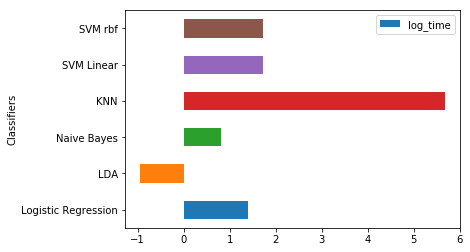

In [82]:
df.plot(kind='barh', x='Classifiers', y='log_time')

    Em termos de score, os classificadores deste lab não apresentaram melhora significativa estando dentro da média dos demais classificadores.

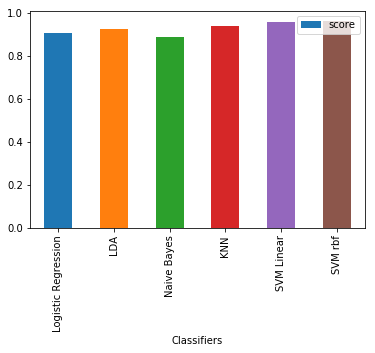

In [76]:
df.plot(kind='bar', x='Classifiers', y='score', )